In [6]:
import pandas as pd
#Cerinta 1
df = pd.read_csv('train.csv') 

print("Informatii despre colaone:")
print(df.info())
print("\nValori lipsa în fiecare coloana:")
print(df.isnull().sum())
print("\nNumarul de linii duplicate:", df.duplicated().sum())
print("\nNumar total de linii:", len(df))
print("Numar total de coloane:", len(df.columns))


Informatii despre colaone:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Valori lipsa în fiecare coloana:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare   

Procente supravietuire si deces:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Procente pasageri pe clase:
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64
Procente barbati și femei:
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


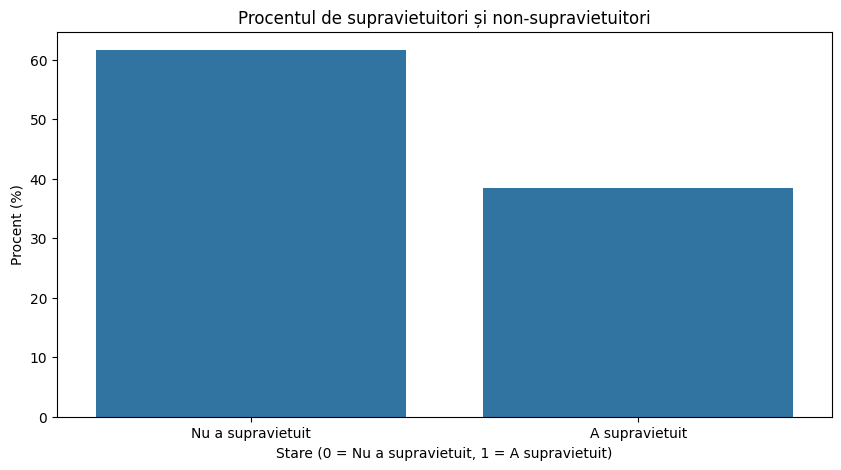

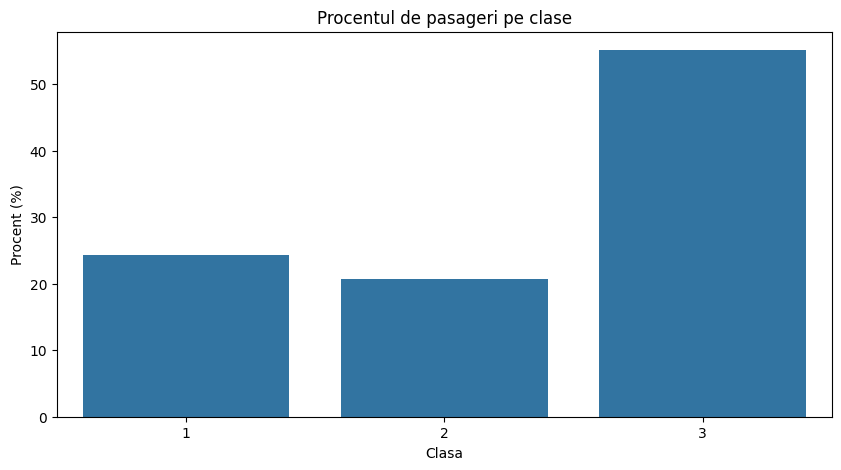

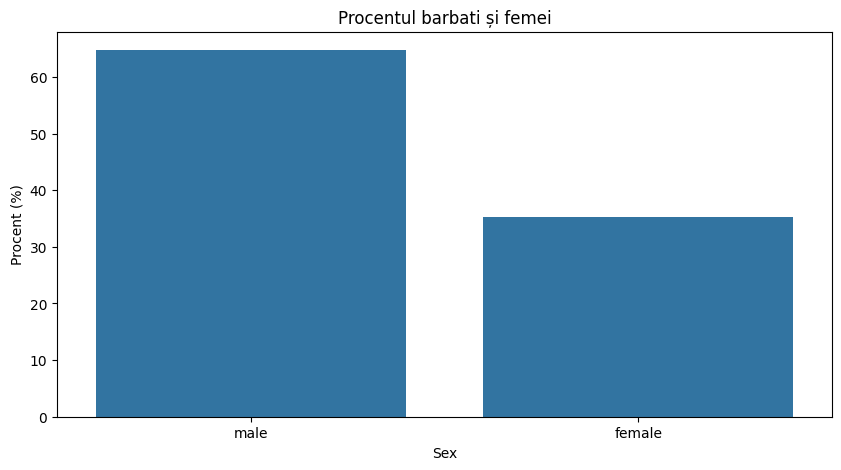

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 2
df = pd.read_csv('train.csv')
survival_count = df['Survived'].value_counts(normalize=True) * 100
print("Procente supravietuire si deces:")
print(survival_count)
class_count = df['Pclass'].value_counts(normalize=True) * 100
print("Procente pasageri pe clase:")
print(class_count)

gender_count = df['Sex'].value_counts(normalize=True) * 100
print("Procente barbati și femei:")
print(gender_count)

plt.figure(figsize=(10, 5))
sns.barplot(x=survival_count.index, y=survival_count.values)
plt.title('Procentul de supravietuitori și non-supravietuitori')
plt.xlabel('Stare (0 = Nu a supravietuit, 1 = A supravietuit)')
plt.ylabel('Procent (%)')
plt.xticks(ticks=[0, 1], labels=['Nu a supravietuit', 'A supravietuit'])
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=class_count.index, y=class_count.values)
plt.title('Procentul de pasageri pe clase')
plt.xlabel('Clasa')
plt.ylabel('Procent (%)')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=gender_count.index, y=gender_count.values)
plt.title('Procentul barbati și femei')
plt.xlabel('Sex')
plt.ylabel('Procent (%)')
plt.show()


In [5]:
import pandas as pd
#Cerinta 4
df = pd.read_csv('train.csv')

missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # doar coloanele cu valori lipsa
missing_percent = (missing_data / len(df)) * 100

print("Numarul și procentul valorilor lipsă pe coloane:")
print(pd.DataFrame({'Numar valori lipsă': missing_data, 'Procent': missing_percent}))

# Calculam procentul valorilor lipsa pe coloane în functie de starea de supravietuire
for column in missing_data.index:
    print(f"\nProcentul valorilor lipsa pentru coloana {column} după supravietuire:")
    # Grupam dupa coloana Survived si calculam procentul valorilor lipsa pentru coloana respectiva
    missing_by_survival = df.groupby('Survived')[column].apply(lambda x: (x.isnull().mean()) * 100)
    print(missing_by_survival)



Numarul și procentul valorilor lipsă pe coloane:
          Numar valori lipsă    Procent
Age                      177  19.865320
Cabin                    687  77.104377
Embarked                   2   0.224467

Procentul valorilor lipsa pentru coloana Age după supravietuire:
Survived
0    22.768670
1    15.204678
Name: Age, dtype: float64

Procentul valorilor lipsa pentru coloana Cabin după supravietuire:
Survived
0    87.613843
1    60.233918
Name: Cabin, dtype: float64

Procentul valorilor lipsa pentru coloana Embarked după supravietuire:
Survived
0    0.000000
1    0.584795
Name: Embarked, dtype: float64


AgeGroup
21-40    385
0-20     179
41-60    128
61+       22
Name: count, dtype: int64


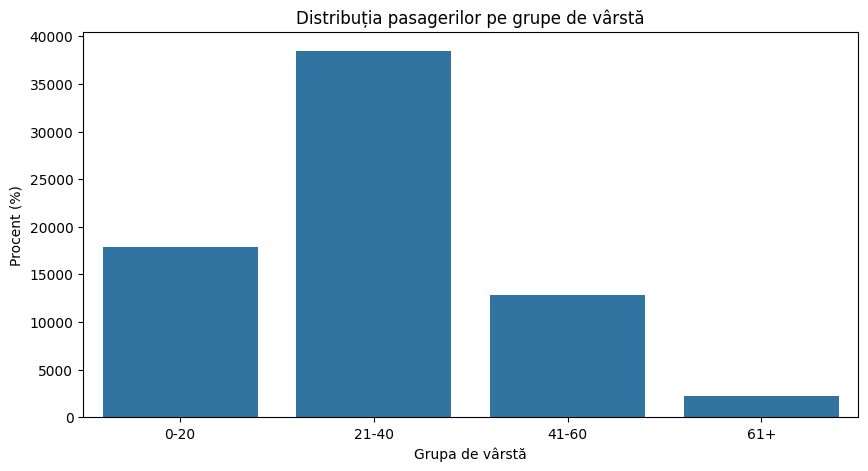

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 5
df = pd.read_csv('train.csv')
groups = [0, 20, 40, 60, df['Age'].max()]
labels = ['0-20', '21-40', '41-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=groups, labels=labels, right=False)

age_group_counts = df['AgeGroup'].value_counts()
print(age_group_counts)
age_group_counts = age_group_counts*100
plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Distribuția pasagerilor pe grupe de vârstă')
plt.xlabel('Grupa de vârstă')
plt.ylabel('Procent (%)')
plt.show()

Rata de supravietuire pentru barbati pe grupe de varsta:
AgeGroup
0-20     29
21-40    46
41-60    16
61+       2
Name: Survived, dtype: int64


C:\Users\thug\AppData\Local\Temp\ipykernel_9852\1037018537.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = men.groupby('AgeGroup')['Survived'].sum()
C:\Users\thug\AppData\Local\Temp\ipykernel_9852\1037018537.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = men.groupby('AgeGroup')['Survived'].mean() * 100


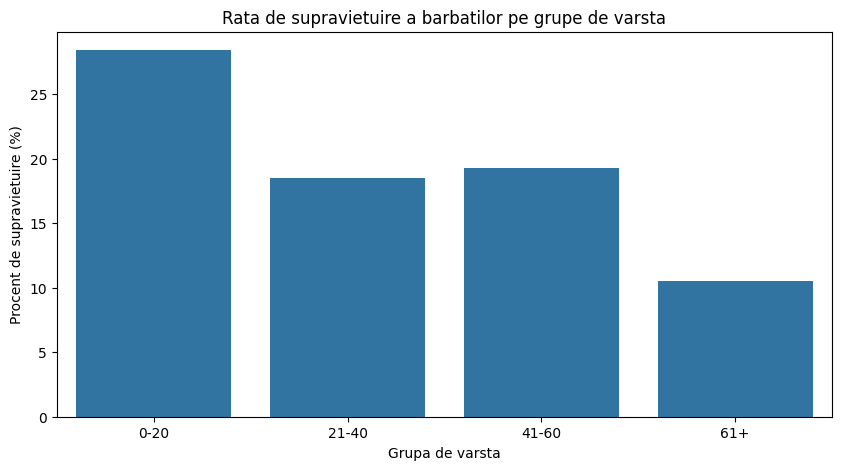

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 6
df = pd.read_csv('train.csv')

groups = [0, 20, 40, 60, df['Age'].max()]
labels = ['0-20', '21-40', '41-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=groups, labels=labels)

#filtrarea datelor pentru a include doar barbati
men = df[df['Sex'] == 'male']

survival_rates = men.groupby('AgeGroup')['Survived'].sum()

print("Rata de supravietuire pentru barbati pe grupe de varsta:")
print(survival_rates)
survival_rates = men.groupby('AgeGroup')['Survived'].mean() * 100
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Rata de supravietuire a barbatilor pe grupe de varsta')
plt.xlabel('Grupa de varsta')
plt.ylabel('Procent de supravietuire (%)')
plt.show()




Procentul de copii la bord: 12.68%


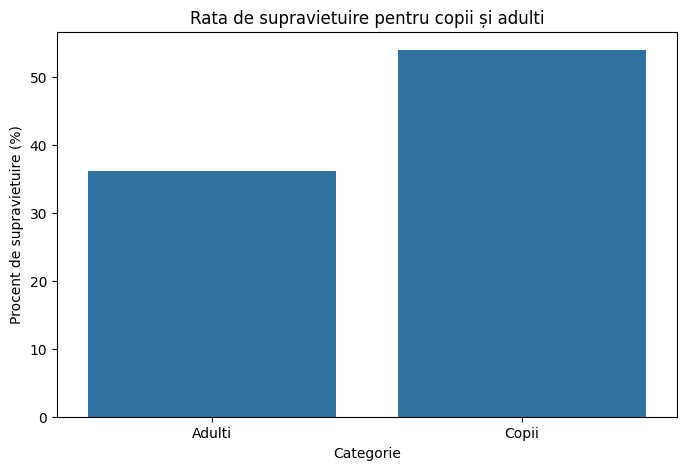

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 7
df = pd.read_csv('train.csv')
df['Copil'] = df['Age'] < 18

#calculul procentului de copii la bord
total_passengers =len(df)
children_count = df['Copil'].sum()
children_percentage = (children_count / total_passengers) * 100
print(f"Procentul de copii la bord: {children_percentage:.2f}%")

survival_rates = df.groupby('Copil')['Survived'].mean() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Rata de supravietuire pentru copii și adulti')
plt.xlabel('Categorie')
plt.ylabel('Procent de supravietuire (%)')
plt.xticks(ticks=[0, 1], labels=['Adulti', 'Copii'])
plt.show()


Tabela de corelație între titluri și sex:
Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


C:\Users\thug\AppData\Local\Temp\ipykernel_17868\4249890119.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')


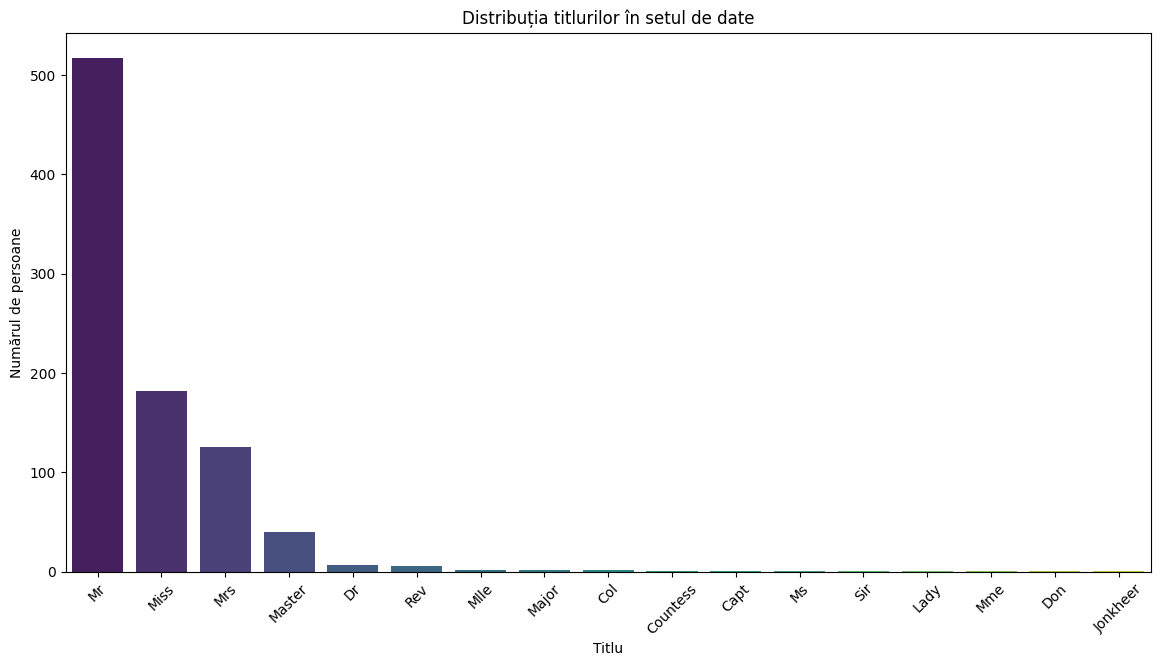

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cerinta 9
df = pd.read_csv('train.csv')

#extragerea titlurilor
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

#crearea unei tabele de corelatie între titluri si sex
title_sex_cross = pd.crosstab(df['Title'], df['Sex'])

print("Tabela de corelatie intre titluri si sex:")
print(title_sex_cross)

plt.figure(figsize=(14, 7))
title_counts = df['Title'].value_counts()
sns.barplot(x=title_counts.index, y=title_counts.values, palette='viridis')
plt.title('Distributia titlurilor în setul de date')
plt.ylabel('Numarul de persoane')
plt.xlabel('Titlu')
plt.xticks(rotation=45)
plt.show()


C:\Users\thug\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thug\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thug\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

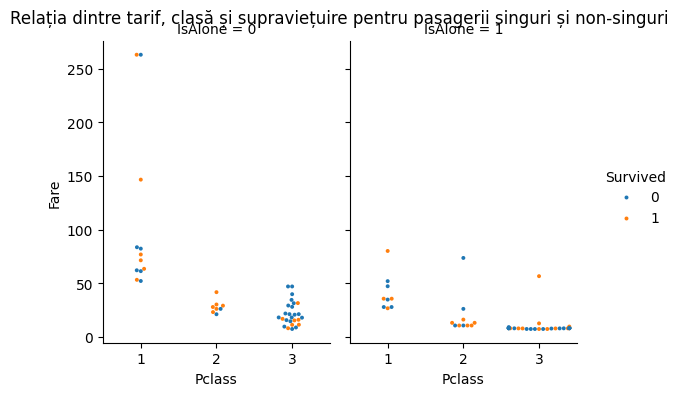

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Cerinta 10
df = pd.read_csv('train.csv')
#vedem daca sunt singuri sau nu
df['IsAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)

subset_df = df.head(100)

plt.figure(figsize=(10, 6))
sns.catplot(x="Pclass", y="Fare", hue="Survived", col="IsAlone",
            data=subset_df, kind="swarm",
            height=4, aspect=.7, s=8)

plt.subplots_adjust(top=0.9)
plt.suptitle('Relația dintre tarif, clasă și supraviețuire pentru pasagerii singuri și non-singuri')
plt.show()
